> Introduction

**In this project we aim to predict whether a certain red wine is “good quality” or not. Each wine in this dataset is assigned a “quality” value between 0 and 1. 11 main features which were used to predict the quality is listed below:**

1)Fixed acidity

2)Volatile acidity

3)Citric acid

4)Residual sugar

5)Chlorides

6)Free sulfur dioxide

7)Total sulfur dioxide

8)Density

9)pH

10)Sulfates

11)Alcohol

> Importing Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm,preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score,recall_score,f1_score

In [2]:
df=pd.read_csv("WineQT.csv")

Lets first Explore our imported dataset. We have stored our dataset in a variable called df lets have a look at a few rows first!



> Data Exploration

In [3]:
#Data Exploration
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [4]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [6]:
unique=df['quality'].unique()
print(unique)

[5 6 7 4 8 3]


> EDA with Vizualization

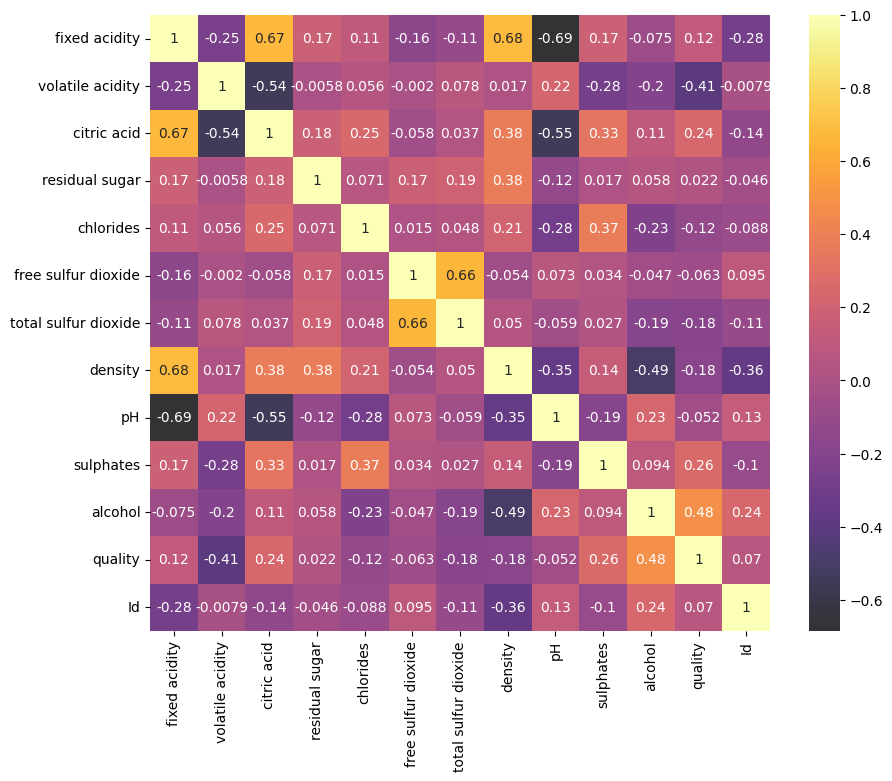

In [7]:
#EDA with Vizualization
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),cmap='inferno',annot=True,alpha=0.8)
plt.show()

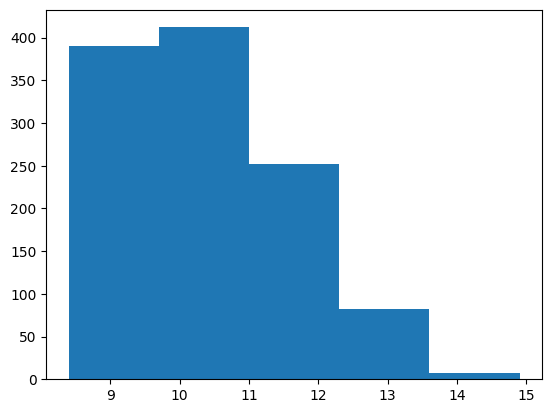

In [8]:
plt.hist(df['alcohol'], bins=5)
plt.show()

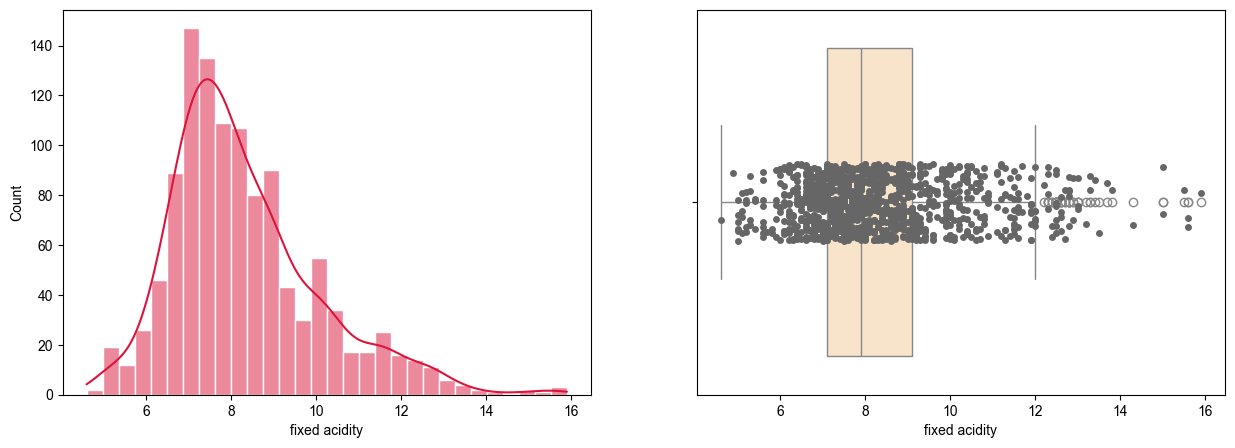

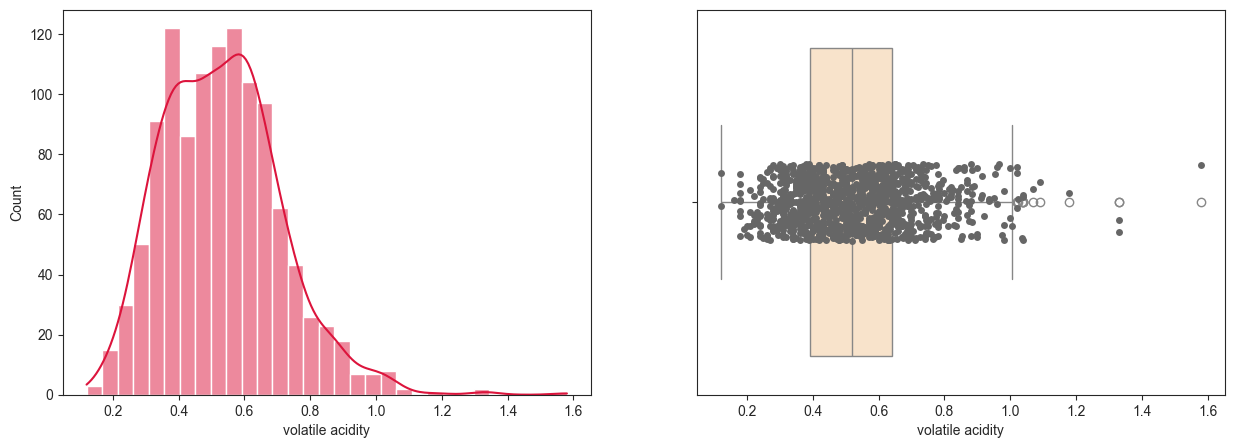

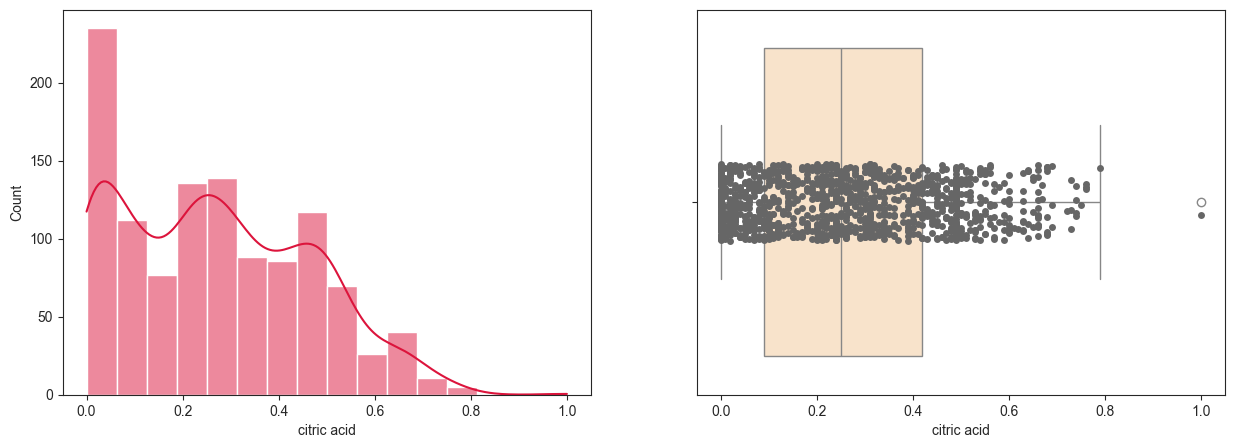

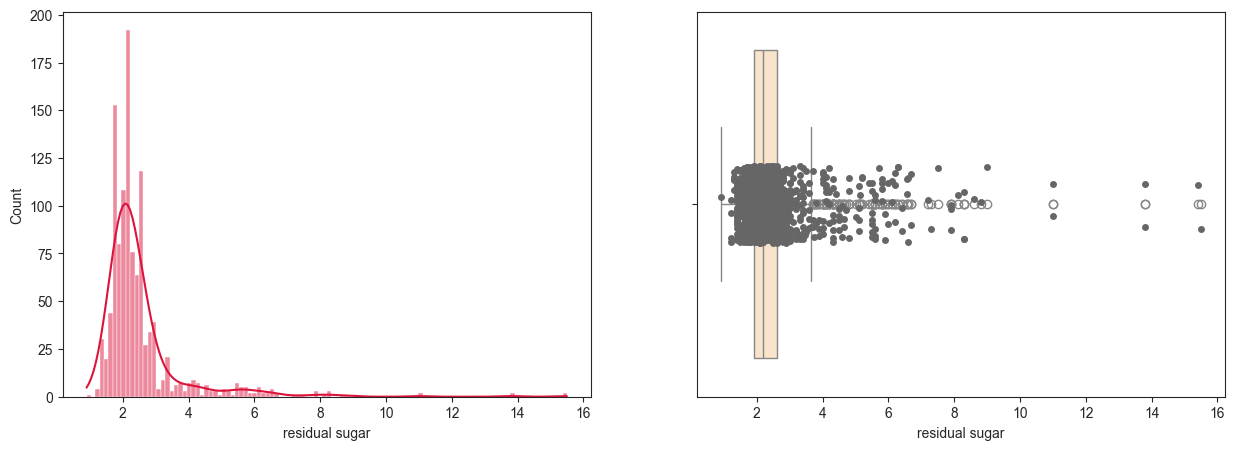

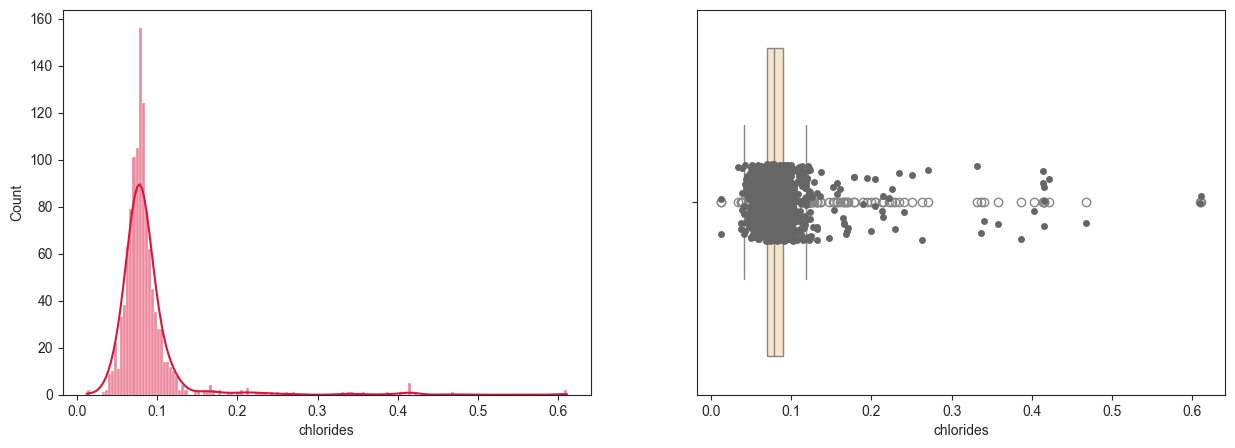

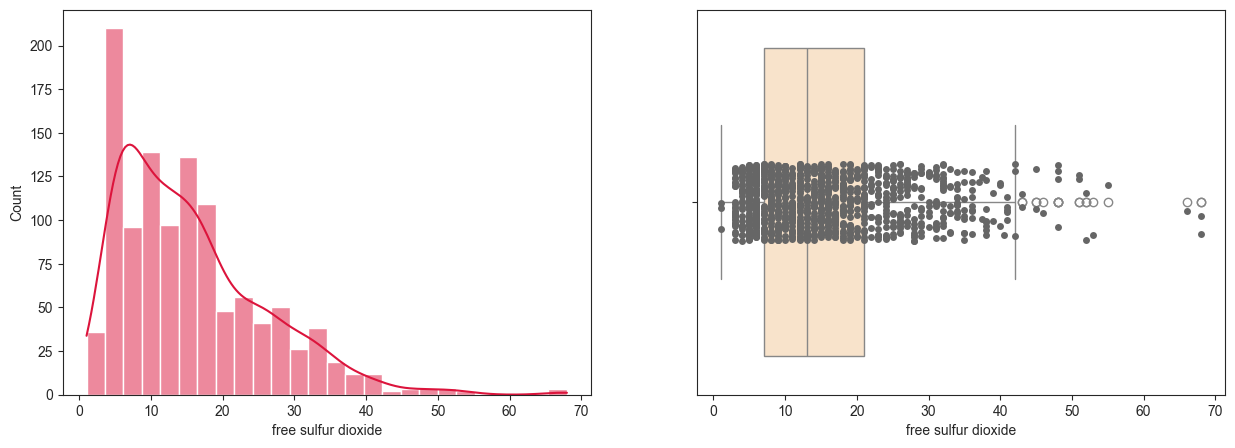

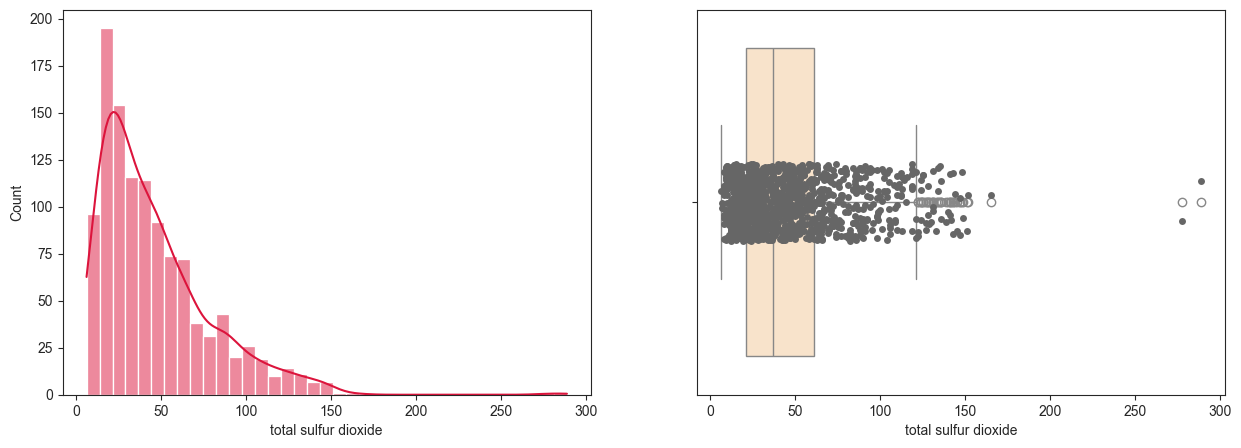

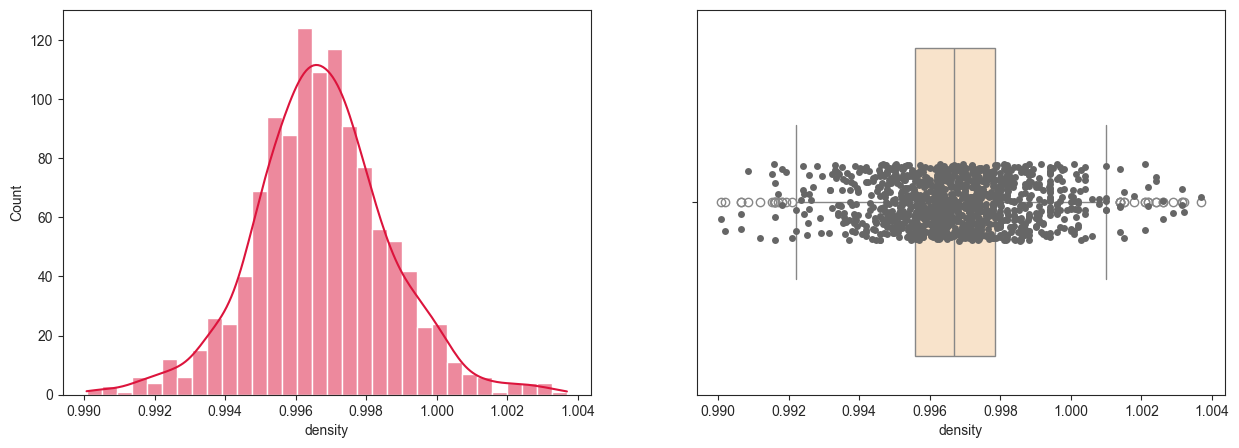

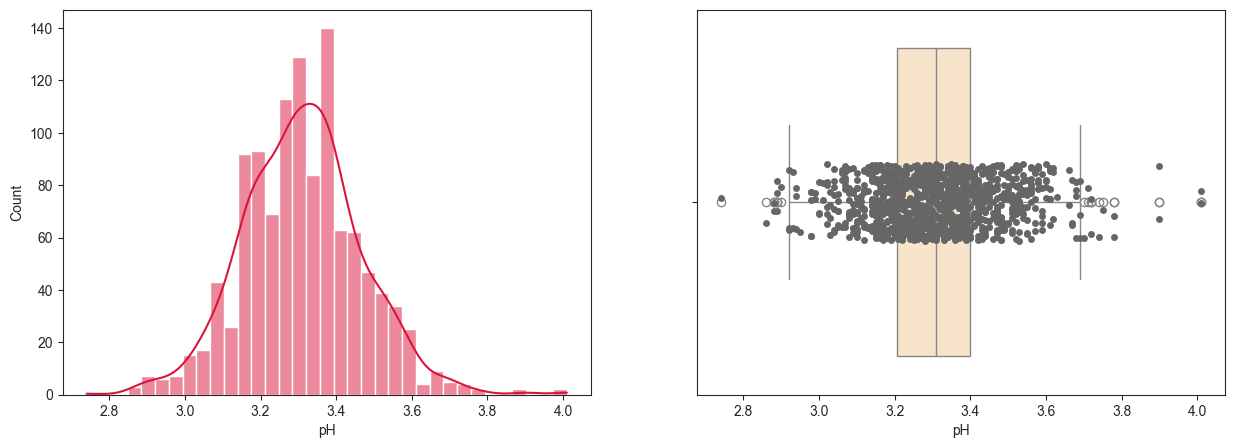

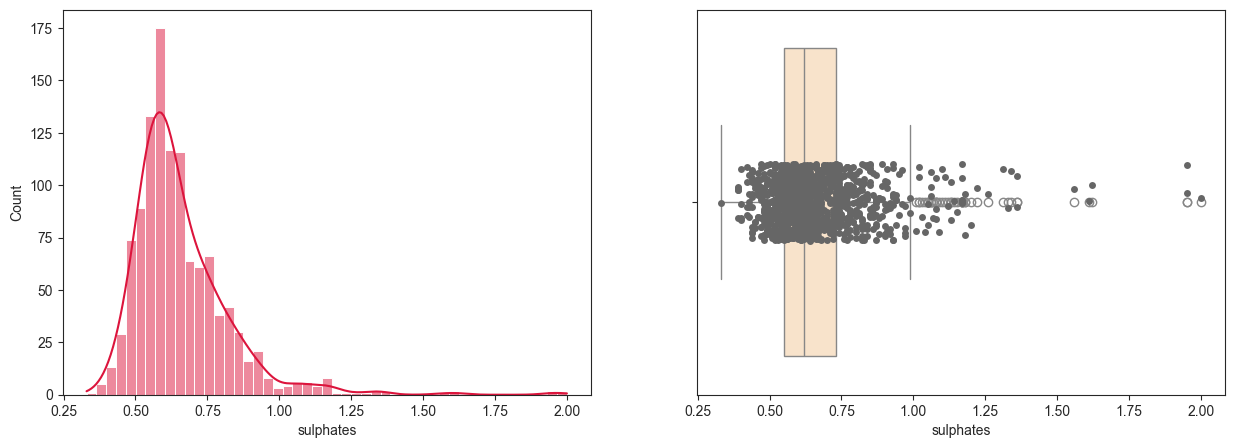

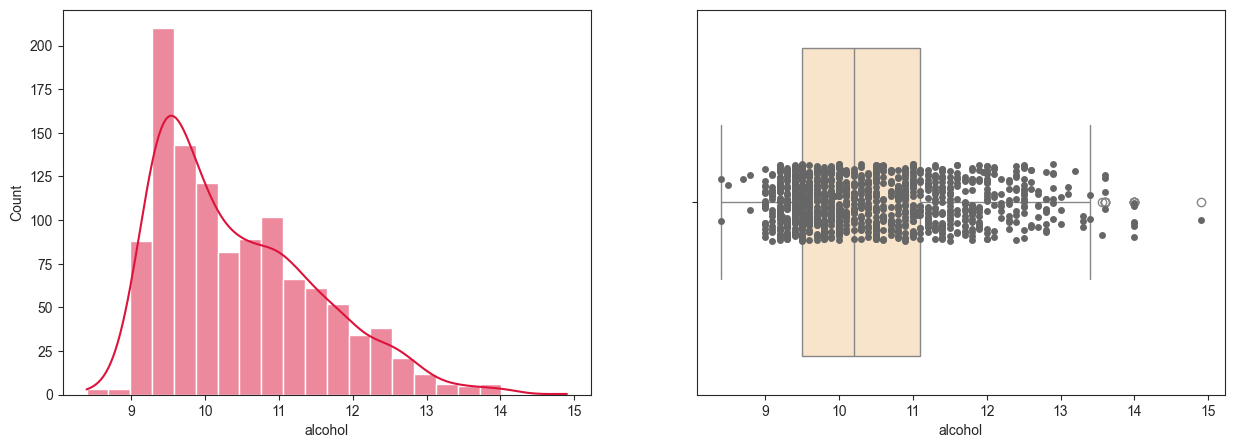

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Rename variables with descriptive names
input_data = df.drop(columns=["quality", "Id"], axis=1)  # Original column names assumed
label = df["quality"]

def explore_feature_distributions(data_frame):

    for feature_name in data_frame.columns:
        fig, ax = plt.subplots(figsize=(15, 5), nrows=1, ncols=2)
        sns.set_style("ticks")  
        sns.histplot(data=data_frame, x=feature_name, kde=True, ax=ax[0], color="#DC143C")  # Adjust color
        ax[0].set_xlabel(feature_name)
        sns.boxplot(data=data_frame, x=feature_name, ax=ax[1], color="#FFE4C4")
        sns.stripplot(data=data_frame, x=feature_name, color="0.4", ax=ax[1])  # Add stripplot for individual points
    plt.show()

explore_feature_distributions(input_data)

After initial examination its clear that

- There are no null values present in our dataset.
- Column ID can be dropped since its not necessary for our prediction.
- Column quality is our target variable.
- All the datatypes are either float or int so there is no need for any encoding.
- It's a multiclass classification problem since we have [5 6 7 4 8 3] in our target.

> Data Pre-processing

In [10]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [11]:
#Data Pre-processing
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
features, labels=  oversample.fit_resample(df.drop(["quality"],axis=1),df["quality"])

In [12]:
scaler = preprocessing.MinMaxScaler()
names = features.columns
d = scaler.fit_transform(features)

In [13]:
scaled_df = pd.DataFrame(d, columns=names)
scaled_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Id
0,0.247788,0.397260,0.00,0.068493,0.106845,0.149254,0.098940,0.567548,0.606299,0.137725,0.153846,0.000000
1,0.283186,0.520548,0.00,0.116438,0.143573,0.358209,0.215548,0.494126,0.362205,0.209581,0.215385,0.000626
2,0.283186,0.438356,0.04,0.095890,0.133556,0.208955,0.169611,0.508811,0.409449,0.191617,0.215385,0.001252
3,0.584071,0.109589,0.56,0.068493,0.105175,0.238806,0.190813,0.582232,0.330709,0.149701,0.215385,0.001879
4,0.247788,0.397260,0.00,0.068493,0.106845,0.149254,0.098940,0.567548,0.606299,0.137725,0.153846,0.002505


In [14]:
X_train, X_test, y_train, y_test=train_test_split(scaled_df,labels,test_size=0.33,random_state=42)

> Modelling

In [15]:
#Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


# Create and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, r2_score
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.8589341692789969


In [17]:
# Create and train the SVM model
svm_model = SVC(kernel='rbf', random_state=42)  # Replace 'rbf' with your desired kernel
svm_model.fit(X_train, y_train)

# Make predictions on the test set
svm_y_pred = svm_model.predict(X_test)

In [18]:
svm_accuracy = accuracy_score(y_test, svm_y_pred)
print(svm_accuracy)

0.7408568443051202


In [19]:
# Create and train the Logistic Regression model
lr_model = LogisticRegression(random_state=42)  # Adjust hyperparameters as needed
lr_model.fit(X_train, y_train)

# Make predictions on the test set
lr_y_pred = lr_model.predict(X_test)

In [20]:
lr_accuracy = accuracy_score(y_test, lr_y_pred)
print(lr_accuracy)

0.6018808777429467


In [21]:
# Define the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)  # Set the number of neighbors (k)

# Train the model
knn_model.fit(X_train, y_train)

# Make predictions on the test set
knn_y_pred = knn_model.predict(X_test)

knn_accuracy = accuracy_score(y_test, knn_y_pred)
print(knn_accuracy)

0.7701149425287356


> Results

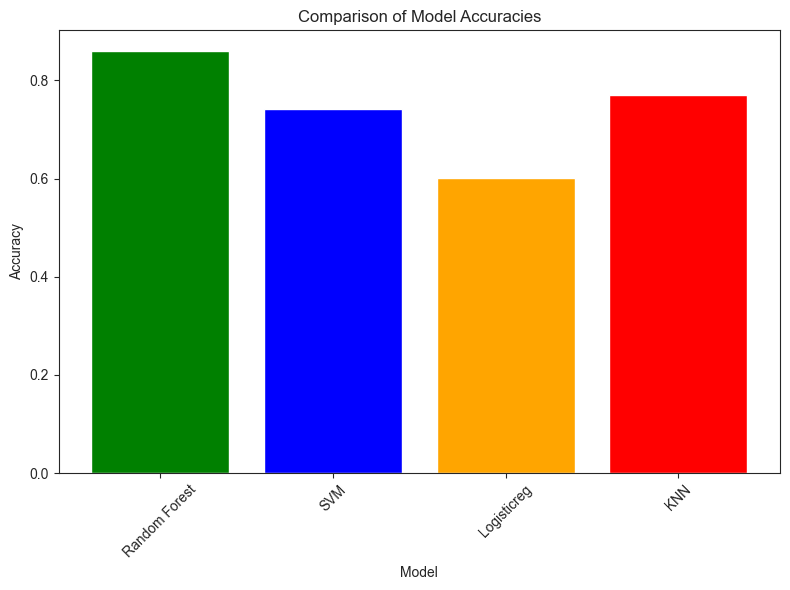

In [22]:
#Results
import matplotlib.pyplot as plt

# Model names
model_names = ["Random Forest", "SVM", "Logisticreg","KNN"]  # Replace with your actual model names

# Check and convert data types if necessary
accuracies = [accuracy,svm_accuracy,lr_accuracy,knn_accuracy]
if not all(isinstance(x, (int, float)) for x in accuracies):
    try:
        accuracies = [float(x) for x in accuracies]  # Convert to float if possible
    except ValueError:
        print("Error: Accuracies must be numerical values.")
        exit()

# Create the bar chart
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
plt.bar(model_names, accuracies, color=['green', 'blue', 'orange','red'])
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Comparison of Model Accuracies")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show or save the chart
plt.show()  # Show the chart
